# Ordinary differential equations

An ordinary differential equation is an equation of a type
$$
\frac{dx}{dt} = f(x,t),
$$
where $f(x,t)$ is some function.
Together with the initial condition $x(t=0) = x_0$ it defines
the $x(t)$ dependence at $t>0$.

In many physical applications $t$ plays the role of the time variable (classical mechanics problems),
although this is not always the case.

Some differential equations can be solved explicitly, the solution to
$$
\frac{dx}{dt} = \sin t,
$$
reads
$$
x(t) = x_0 + \int_0^t \sin t' dt' = x_0 + 1 - \cos t.
$$

In general case, however, the solution cannot be obtained analytically.
Let us consider for example
$$
\frac{dx}{dt} = -x^3 + \sin t.
$$

In this case one resorts to numerical methods.

## Euler's method

Suppose we have an ODE:
$$
\frac{dx}{dt} = f(x,t).
$$

Let us apply the Taylor expansion to express $x(t+h)$ in terms of $x(t)$:
$$
x(t+h) = x(t) + h \, \frac{dx}{dt} + \mathcal{O}(h^2)~.
$$

Given that $dx/dt = f(x,t)$ and neglecting the high-order terms in $h$ we have
$$
x(t+h) \approx x(t) + h \, f[x(t),t]~.
$$
We can iteratively apply this relation starting from $t = 0$ to evaluate $x(t)$ at $t > 0$.

This is the essence of the *Euler's method* -- the simplest method for solving ODEs numerically.

In [1]:
import numpy as np

def ode_euler_step(f, x, t, h):
    """Perform a single step h using Euler's scheme.

    Args:
    f: the function that defines the ODE.
    x: the value of the dependent variable at the present step.
    t: the present value of the time variable.
    h: the time step

    Returns:
    xnew: the value of the dependent variable at the step t+h
    """
    return x + h * f(x,t)

def ode_euler(f, x0, t0, h, nsteps):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps using Euler's method.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
          h: the time step
     nsteps: the total number of Euler steps

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_euler_step(f, x[i], t[i], h)
    return t,x

Let us apply the Euler's method to solve the differential equation
$$
\frac{dx}{dt} = -x^3 + \sin t.
$$
with the initial condition $x_0 = 0$ at $t_0 = 0$ from $t = 0$ to $t = 10$ in 1000 steps.

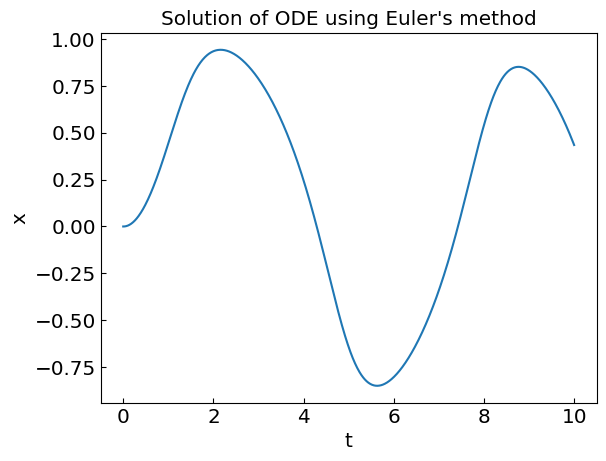

In [2]:
# Define the ODE
def f(x, t):
    return -x**3 + np.sin(t)

t0 = 0.
tend = 10.0
N = 1000
h = (tend - t0) / N
x0 = 0.

ODEsol = ode_euler(f,x0,t0,h,N)

# Plot the solution
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.plot(ODEsol[0], ODEsol[1])
plt.xlabel('t')
plt.ylabel('x')
plt.title("Solution of ODE using Euler's method")
plt.show()


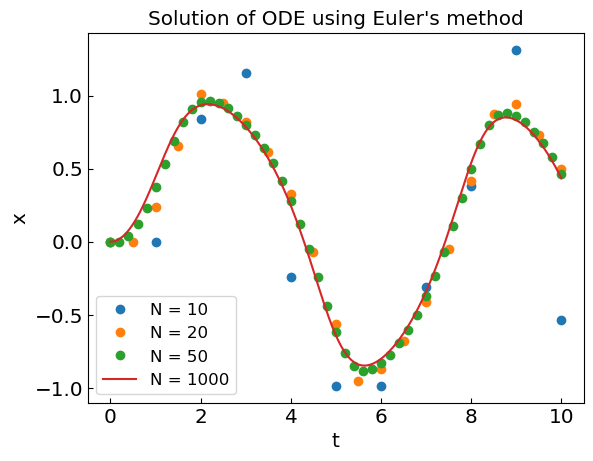

In [3]:
N = 10
h = (tend - t0) / N
ODEsolN10 = ode_euler(f,x0,t0,h,N)

N = 20
h = (tend - t0) / N
ODEsolN20 = ode_euler(f,x0,t0,h,N)

N = 50
h = (tend - t0) / N
ODEsolN50 = ode_euler(f,x0,t0,h,N)

N = 1000
h = (tend - t0) / N
ODEsolN1000 = ode_euler(f,x0,t0,h,N)

plt.plot(ODEsolN10[0], ODEsolN10[1], 'o', label='N = 10')
plt.plot(ODEsolN20[0], ODEsolN20[1], 'o', label='N = 20')
plt.plot(ODEsolN50[0], ODEsolN50[1], 'o', label='N = 50')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using Euler's method")
plt.show()

The error of Euler's scheme is proportional to $h^2$ at each step. Since the total number of steps is $N = (t_{\rm end} - t_0)/h$, the total accumulated error is linear in $h$, i.e. of order $\mathcal{O}(h)$.

## Midpoint (second-order Runge-Kutta) method

Better schemes with a smaller error can be achieved with little extra work.

Euler's method essentially corresponds to approximating the derivative $dx/dt$ with a forward difference
$$
\frac{dx}{dt} = f(x,t) \approx \frac{x(t+h) - x(t)}{h} + \mathcal{O}(h).
$$

Recall that better accuracy in numerical differentiation can be obtained if one uses central (midpoint) difference, 
$$
f(x,t+h/2) \approx \frac{x(t+h) - x(t)}{h} + \mathcal{O}(h^2).
$$

Let us exploit this idea applied to ODEs.
Consider Taylor expansions of $x(t+h)$ and $x(t)$ around $x(t+h/2)$:
\begin{align}
x(t+h) = x(t + h/2) + \frac{1}{2} h \left( \frac{dx}{dt} \right)_{t+h/2} + \frac{1}{8} h^2 \left( \frac{d^2x}{dt^2} \right)_{t+h/2} + \mathcal{O}(h^3),\\
x(t) = x(t + h/2) - \frac{1}{2} h \left( \frac{dx}{dt} \right)_{t+h/2} + \frac{1}{8} h^2 \left( \frac{d^2x}{dt^2} \right)_{t+h/2} + \mathcal{O}(h^3),\\
\end{align}

Subtracting the second equation from the first one we get
\begin{align}
x(t+h) & = x(t) + h \left( \frac{dx}{dt} \right)_{t+h/2} + \mathcal{O}(h^3),\\
& = x(t) + h f[x(t+h/2),t+h/2)] + \mathcal{O}(h^3)
\end{align}

How to calculate $x(t+h/2)$? Use Euler's scheme
$$
x(t+h/2) = x(t) + \frac{1}{2}h f(x,t) + \mathcal{O}(h^2)
$$

It can be shown using Taylor expansion that
$$
f[x(t+h/2),t+h/2)] = f\left[x(t) + \frac{1}{2}h f(x,t), t + \frac{1}{2}h\right] + \mathcal{O}(h^2).
$$

Therefore, 
$$
x(t+h) = x(t) + h f\left[x(t) + \frac{1}{2}h f(x,t), t + \frac{1}{2}h\right]  + \mathcal{O}(h^3),\\
$$
which can iteratively be written as
\begin{align}
k_1 & = h \, f(x,t), \\
k_2 & = h \, f(x+k_1/2,t+h/2), \\
x(t+h) & = x(t) + k_2~.
\end{align}

This is the midpoint (or second-order Runge-Kutta method) which has a local (per one step) error of order $\mathcal{O}(h^3)$.


In [4]:
import numpy as np

def ode_rk2_step(f, x, t, h):
    """Perform a single step h using 2nd order Runge-Kutta scheme.

    Args:
    f: the function that defines the ODE.
    x: the value of the dependent variable at the present step.
    t: the present value of the time variable.
    h: the time step

    Returns:
    xnew: the value of the dependent variable at the step t+h
    """
    k1 = h * f(x,t)
    k2 = h * f(x + k1/2., t + h /2.)
    return x + k2

def ode_rk2(f, x0, t0, h, nsteps):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps using Euler's method.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
          h: the time step
     nsteps: the total number of Euler steps

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk2_step(f, x[i], t[i], h)
    return t,x

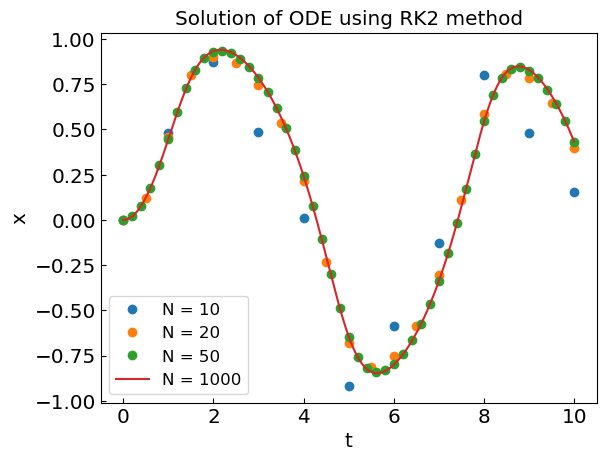

In [5]:
N = 10
h = (tend - t0) / N
ODEsolN10 = ode_rk2(f,x0,t0,h,N)

N = 20
h = (tend - t0) / N
ODEsolN20 = ode_rk2(f,x0,t0,h,N)

N = 50
h = (tend - t0) / N
ODEsolN50 = ode_rk2(f,x0,t0,h,N)

N = 1000
h = (tend - t0) / N
ODEsolN1000 = ode_rk2(f,x0,t0,h,N)

plt.plot(ODEsolN10[0], ODEsolN10[1], 'o', label='N = 10')
plt.plot(ODEsolN20[0], ODEsolN20[1], 'o', label='N = 20')
plt.plot(ODEsolN50[0], ODEsolN50[1], 'o', label='N = 50')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using RK2 method")
plt.show()

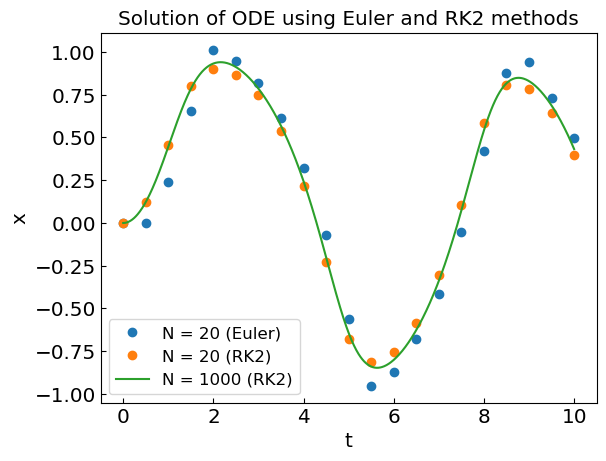

In [6]:
## Compare Euler and RK2 schemes

N = 20
h = (tend - t0) / N
ODEsolN10Euler = ode_euler(f,x0,t0,h,N)
ODEsolN10RK2 = ode_rk2(f,x0,t0,h,N)

N = 1000
h = (tend - t0) / N
ODEsolN1000 = ode_rk2(f,x0,t0,h,N)

plt.plot(ODEsolN10Euler[0], ODEsolN10Euler[1], 'o', label='N = 20 (Euler)')
plt.plot(ODEsolN10RK2[0], ODEsolN10RK2[1], 'o', label='N = 20 (RK2)')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000 (RK2)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using Euler and RK2 methods")
plt.show()

## The Fourth-Order Runge-Kutta method

The above logic can be generalized to cancel high-order error terms in various powers in $h$.
This will require more evaluations of function $f(x,t)$ at intermediate steps.
The following classical 4th order Runge-Kutta method is often considered to be a sweet spot.
It corresponds to the following scheme:
\begin{align}
k_1 & = h \, f(x,t), \\
k_2 & = h \, f(x+k_1/2,t+h/2), \\
k_3 & = h \, f(x+k_2/2,t+h/2), \\
k_4 & = h \, f(x+k_3,t+h), \\
x(t+h) & = x(t) + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)~.
\end{align}



In [7]:
def ode_rk4_step(f, x, t, h):
    """Perform a single step h using 4th order Runge-Kutta method.

    Args:
    f: the function that defines the ODE.
    x: the value of the dependent variable at the present step.
    t: the present value of the time variable.
    h: the time step

    Returns:
    xnew: the value of the dependent variable at the step t+h
    """
    k1 = h * f(x,t)
    k2 = h * f(x + k1/2., t + h /2.)
    k3 = h * f(x + k2/2., t + h /2.)
    k4 = h * f(x + k3, t + h)
    return x + (k1 + 2. * k2 + 2. * k3 + k4) / 6.

def ode_rk4(f, x0, t0, h, nsteps):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps using 4th order Runge-Kutta method.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
          h: the time step
     nsteps: the total number of Euler steps

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk4_step(f, x[i], t[i], h)
    return t,x

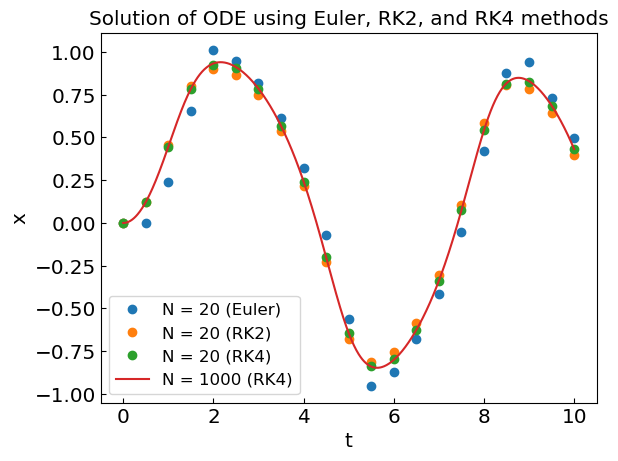

In [8]:
N = 20
h = (tend - t0) / N
ODEsolN10Euler = ode_euler(f,x0,t0,h,N)
ODEsolN10RK2 = ode_rk2(f,x0,t0,h,N)
ODEsolN10RK4 = ode_rk4(f,x0,t0,h,N)

N = 1000
h = (tend - t0) / N
ODEsolN1000 = ode_rk4(f,x0,t0,h,N)

plt.plot(ODEsolN10Euler[0], ODEsolN10Euler[1], 'o', label='N = 20 (Euler)')
plt.plot(ODEsolN10RK2[0], ODEsolN10RK2[1], 'o', label='N = 20 (RK2)')
plt.plot(ODEsolN10RK4[0], ODEsolN10RK4[1], 'o', label='N = 20 (RK4)')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000 (RK4)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using Euler, RK2, and RK4 methods")
plt.show()

## Adaptive time step

It can be useful to control the time step $h$ adaptively, such that it corresponds to the desired accuracy of calculations.
If $h$ is too small, we waste computing resources by making too many calculations.
On the other hand, if $h$ is too large, we will not achieve the desired accuracy.

To solve this problem we can introduce error estimate at each step, and adjust the time step accordingly to reduce the error.
One way to do so is to use a combination of two Runge-Kutta methods of different order.
The difference between the two gives an error estimate for the present step size, which can then be adjusted as necessary.
The [Runge-Kutta-Fehlberg method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta%E2%80%93Fehlberg_method) is one popular example combining 4th and 5th order Runge-Kutta methods.

Here we consider another approach applied to 4th order Runge-Kutta method. Recall that the error for one time step $h$ is of order $ch^5$. Let us take two RK4 steps h to approximate $x(t+2h) \approx x_1$. Then, the error estimate is
$$
x(t+2h) = x_1 + 2 c h^5. 
$$
On the other hand, $x(t+2h)$ can also be approximated by a single RK4 step of size 2h, $x(t+2h) \approx x_2$ with
$$
x(t+2h) = x_2 + 32 c h^5. 
$$
The error $\epsilon c h^5$ for a single RK4 step of size $h$ is thus
$$
\epsilon = |c h^5| = \frac{|x_1 - x_2|}{30}.
$$

If the desired accuracy per unit time is $\delta$, the desired accuracy per time step is $h' \delta$, and $h'$ should therefore be equal to
$$
h' = h \left( \frac{30 h \delta}{|x_1 - x_2|} \right)^{1/4}~.
$$

In [9]:
def ode_rk4_adaptive(f, x0, t0, h0, tmax, delta = 1.e-6):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps 
    using 4th order Runge-Kutta method with adaptive time step.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
         h0: the initial time step
       tmax: the maximum time
      delta: the desired accuracy per unit time

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    ts = [t0]
    xs = [x0]
    h = h0
    t = t0
    i = 0
    while (t < tmax):
        if (t + h >= tmax):
            ts.append(tmax)
            h = tmax - t
            xs.append(ode_rk4_step(f, xs[i], ts[i], h))
            t = tmax
            break
        
        x1 = ode_rk4_step(f, xs[i], ts[i], h)
        x1 = ode_rk4_step(f, x1, ts[i] + h, h)
        x2 = ode_rk4_step(f, xs[i], ts[i], 2*h)
        
        rho = 30. * h * delta / np.abs(x1 - x2)
        if rho < 1.:
            h *= rho**(1/4.)
        else:
            if (t + 2.*h) < tmax:
                xs.append(x1)
                ts.append(t + 2*h)
                t += 2*h
            else:
                xs.append(ode_rk4_step(f, xs[i], ts[i], h))
                ts.append(t + h)
                t += h
            i += 1
            h = min(2.*h, h * rho**(1/4.))
        
    return ts,xs

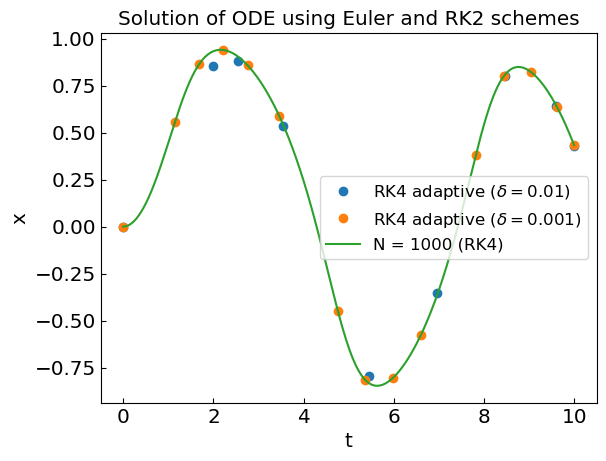

In [10]:
N = 10
h = (tend - t0) / N
delta = 1.e-2
ODEsolN10RK4adaptive = ode_rk4_adaptive(f,x0,t0,h,tend, delta)

delta2 = 1.e-3
ODEsolN10RK4adaptive2 = ode_rk4_adaptive(f,x0,t0,h,tend, delta2)

plt.plot(ODEsolN10RK4adaptive[0], ODEsolN10RK4adaptive[1], 'o', label='RK4 adaptive (${\delta}=$' + str(delta) + ')')
plt.plot(ODEsolN10RK4adaptive2[0], ODEsolN10RK4adaptive2[1], 'o', label='RK4 adaptive (${\delta}=$' + str(delta2) + ')')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000 (RK4)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using Euler and RK2 schemes")
plt.show()

## Implicit methods and stiff equations

Consider the following ODE
$$
\frac{dx}{dt} = -15x,
$$
with $x(0) = 1$.

The solution is 
$$
x(t) = e^{-15t},
$$
which tends to zero as $t \to \infty$.

If you apply Euler's scheme with $h = 1/4$ we have

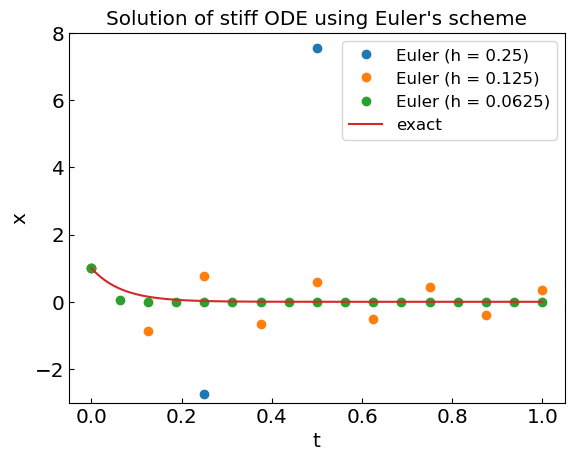

In [11]:
def f_stiff(x,t):
    return -15.*x

def x_stiff_sol(x,t):
    return np.exp(-15.*t)

h1 = 1./4.
t0 = 0.
tend = 1.0
N = round((tend - t0) / h1)
x0 = 1.

ODEsol_stiff1 = ode_euler(f_stiff,x0,t0,h1,N)

h2 = 1./8.
N = round((tend - t0) / h2)
ODEsol_stiff2 = ode_euler(f_stiff,x0,t0,h2,N)

h3 = 1./16.
N = round((tend - t0) / h3)
ODEsol_stiff3 = ode_euler(f_stiff,x0,t0,h3,N)

tref = np.linspace(0,1,100)
xref = x_stiff_sol(0., tref)

plt.plot(ODEsol_stiff1[0], ODEsol_stiff1[1], 'o', label='Euler (h = ' + str(h1) +')')
#plt.plot(ODEsol_stiff[0], ODEsol_stiff[1], label='Euler (h = 1/4)')
plt.plot(ODEsol_stiff2[0], ODEsol_stiff2[1], 'o', label='Euler (h = ' + str(h2) +')')
plt.plot(ODEsol_stiff3[0], ODEsol_stiff3[1], 'o', label='Euler (h = ' + str(h3) +')')
plt.plot(tref, xref, label='exact')
plt.ylim(-3.,8.)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of stiff ODE using Euler's scheme")
plt.show()

Euler's scheme gives
$$
x_{n+1} = x_n - 15 h x_n = (1 - 15 h) x_n = (1-15h)^n x_0
$$
where $x_n \equiv x(t+nh)$.

For $h > 2/15$ we have $|x_{n+1}| \to \infty$ as $n \to \infty$ (equivalent to $t \to \infty$), although the true solution exhibits $x \to \infty$ as $t \to \infty$.

This is an example of instability of ODE solver, which is typical for explicit solvers. The same for Runge-Kutta 4th order method.

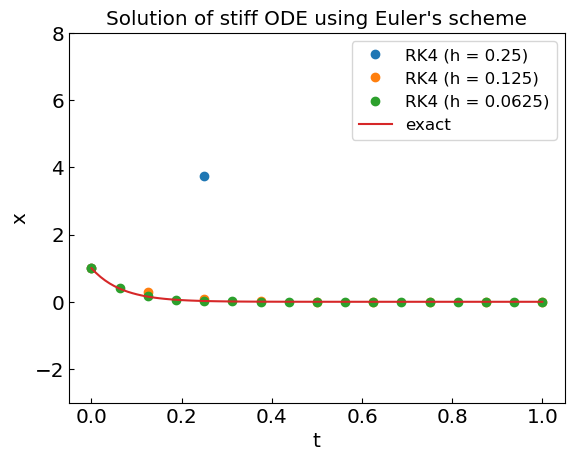

In [12]:
def f_stiff(x,t):
    return -15.*x

def x_stiff_sol(x,t):
    return np.exp(-15.*t)

h1 = 1./4.
t0 = 0.
tend = 1.0
N = round((tend - t0) / h1)
x0 = 1.

ODEsol_stiff1 = ode_rk4(f_stiff,x0,t0,h1,N)

h2 = 1./8.
N = round((tend - t0) / h2)
ODEsol_stiff2 = ode_rk4(f_stiff,x0,t0,h2,N)

h3 = 1./16.
N = round((tend - t0) / h3)
ODEsol_stiff3 = ode_rk4(f_stiff,x0,t0,h3,N)

tref = np.linspace(0,1,100)
xref = x_stiff_sol(0., tref)

plt.plot(ODEsol_stiff1[0], ODEsol_stiff1[1], 'o', label='RK4 (h = ' + str(h1) +')')
#plt.plot(ODEsol_stiff[0], ODEsol_stiff[1], label='Euler (h = 1/4)')
plt.plot(ODEsol_stiff2[0], ODEsol_stiff2[1], 'o', label='RK4 (h = ' + str(h2) +')')
plt.plot(ODEsol_stiff3[0], ODEsol_stiff3[1], 'o', label='RK4 (h = ' + str(h3) +')')
plt.plot(tref, xref, label='exact')
plt.ylim(-3.,8.)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of stiff ODE using Euler's scheme")
plt.show()

## Implicit methods

In implicit methods, the value of the variable at the next time step itself enters the r.h.s.
For example, implicit Euler's method reads
$$
x(t+h) = x(t) + h f[x(t+h),t+h].
$$

Applied to the stiff equation above we have
$$
x_{n+1} = x_n - 15 h x_{n+1},
$$
thus
$$
x_{n+1} = \frac{x_n}{1+15h} = \frac{x_0}{(1+15h)^n}.
$$
Here $x_{n+1} \to 0$ as $n \to \infty$ for any $h>0$, i.e. the method is stable.

Great stability, especially for stiff equations is the main advantage of implicity methods.
The drawback, is that one has to solve an algebraic equation at each time step to determine $x_{n+1}$ [or $x(t+h)$].

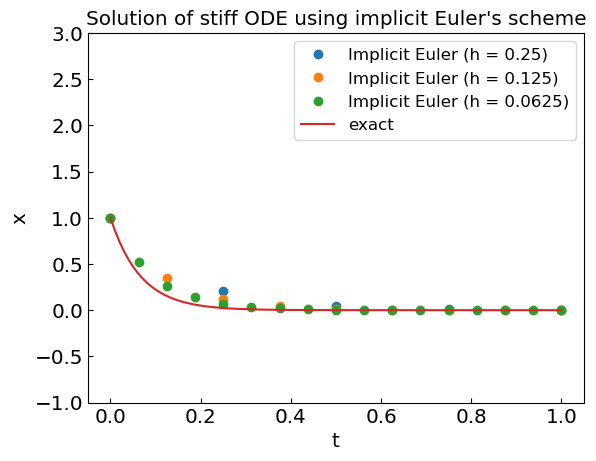

In [13]:
def stiff_implicit(x0,t0,h,nsteps,k=-15.):
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = x[i] / (1 - k*h)
    return t,x

t0 = 0.
tend = 1.0
h1 = 1./4.
N = round((tend - t0) / h1)
ODEsol_stiff1 = stiff_implicit(x0,t0,h1,N)

h2 = 1./8.
N = round((tend - t0) / h2)
ODEsol_stiff2 = stiff_implicit(x0,t0,h2,N)

h3 = 1./16.
N = round((tend - t0) / h3)
ODEsol_stiff3 = stiff_implicit(x0,t0,h3,N)

tref = np.linspace(0,1,100)
xref = x_stiff_sol(0., tref)

plt.plot(ODEsol_stiff1[0], ODEsol_stiff1[1], 'o', label='Implicit Euler (h = ' + str(h1) +')')
#plt.plot(ODEsol_stiff[0], ODEsol_stiff[1], label='Euler (h = 1/4)')
plt.plot(ODEsol_stiff2[0], ODEsol_stiff2[1], 'o', label='Implicit Euler (h = ' + str(h2) +')')
plt.plot(ODEsol_stiff3[0], ODEsol_stiff3[1], 'o', label='Implicit Euler (h = ' + str(h3) +')')
plt.plot(tref, xref, label='exact')
plt.ylim(-1.,3.)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of stiff ODE using implicit Euler's scheme")
plt.show()

## Systems of ODE

System of $N$ first-order ODEs
$$
\frac{d x_1}{dt} = f_1(x_1,\ldots,x_N,t),\\
\frac{d x_2}{dt} = f_2(x_1,\ldots,x_N,t),\\
\ldots \\
\frac{d x_N}{dt} = f_N(x_1,\ldots,x_N,t).
$$

In vector notation:
$$
\frac{d \mathbf{x}}{dt} = \mathbf{f}(\mathbf{x},t).
$$

All the methods we covered have exactly the same structure for systems of ODEs, applied to vectors:
- Euler method
$$
\mathbf{x}(t+h) = \mathbf{x}(t) + h \, \mathbf{f}[\mathbf{x}(t),t]~.
$$


- RK2
\begin{align}
\mathbf {k_1} & = h \, \mathbf{f}(\mathbf{x},t), \\
\mathbf {k_2} & = h \, \mathbf {f}(\mathbf {x}+\mathbf {k_1}/2,t+h/2), \\
\mathbf{x}(t+h) & = \mathbf {x}(t) + \mathbf {k_2}~.
\end{align}


- RK4
\begin{align}
\mathbf{k_1} & = h \, \mathbf{f}(\mathbf{x},t), \\
\mathbf{k_2} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_1}/2,t+h/2), \\
\mathbf{k_3} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_2}/2,t+h/2), \\
\mathbf{k_4} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_3},t+h), \\
\mathbf{x}(t+h) & = \mathbf{x}(t) + \frac{1}{6} (\mathbf{k_1} + 2\mathbf{k_2} + 2\mathbf{k_3} + \mathbf{k_4})~.
\end{align}


In [14]:
def ode_euler_multi(f, x0, t0, h, nsteps):
    """Multi-dimensional version of the Euler method.
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0,:] = x0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1,:] = ode_euler_step(f, x[i], t[i], h)
    return t,x

Example: System of equations
\begin{align}
\frac{dx}{dt} & = xy - x,\\
\frac{dy}{dt} & = y - xy + (\sin t)^2
\end{align}

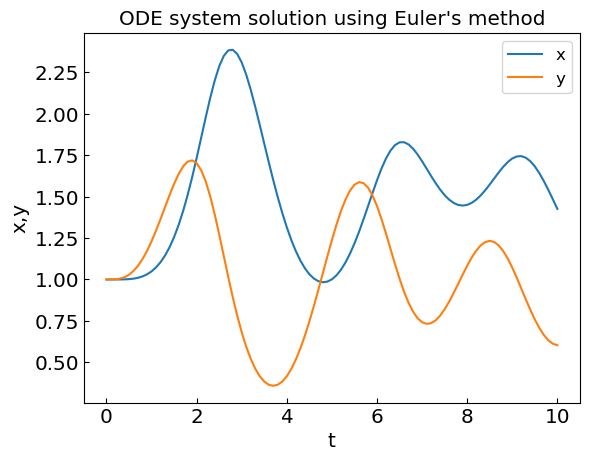

In [15]:
def ff(xin, t):
    x = xin[0]
    y = xin[1]
    return np.array([x*y-x,y-x*y+np.sin(t)**2])

a = 0.
b = 10.0
N = 100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

sol = ode_euler_multi(ff,[1.0,1.0], a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]
plt.title("ODE system solution using Euler's method")
plt.xlabel('t')
plt.ylabel('x,y')
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()


In [16]:
def ode_rk2_multi(f, x0, t0, h, nsteps):
    """Multi-dimensional version of the RK2 method.
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0,:] = x0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk2_step(f, x[i], t[i], h)
    return t,x

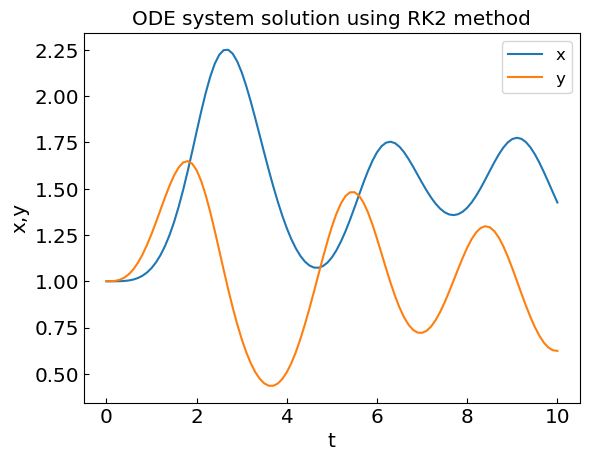

In [17]:
def ff(xin, t):
    x = xin[0]
    y = xin[1]
    return np.array([x*y-x,y-x*y+np.sin(t)**2])

a = 0.
b = 10.0
N = 100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

sol = ode_rk2_multi(ff,[1.0,1.0], a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]
plt.title("ODE system solution using RK2 method")
plt.xlabel('t')
plt.ylabel('x,y')
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

In [18]:
def ode_rk4_multi(f, x0, t0, h, nsteps):
    """Multi-dimensional version of the RK4 method.
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0] = x0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk4_step(f, x[i], t[i], h)
    return t,x

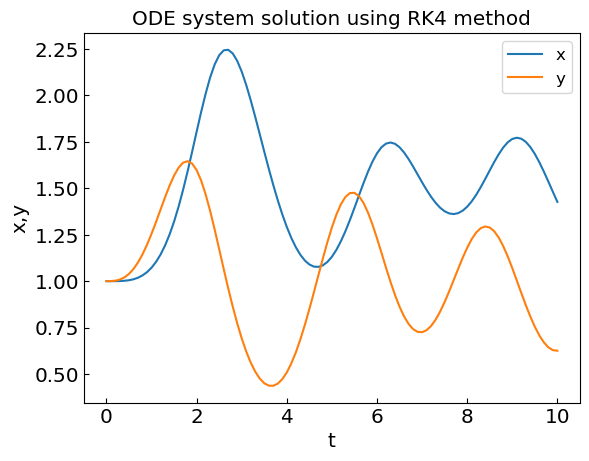

In [19]:
def ff(xin, t):
    x = xin[0]
    y = xin[1]
    return np.array([x*y-x,y-x*y+np.sin(t)**2])

a = 0.
b = 10.0
N = 100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

sol = ode_rk4_multi(ff,[1.0,1.0], a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]
plt.title("ODE system solution using RK4 method")
plt.xlabel('t')
plt.ylabel('x,y')
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

## Second-order ODEs

A system of $N$ 2nd-order ODEs

$$
\frac{d^2 \mathbf{x}}{dt^2} = \mathbf{f}(\mathbf{x}, d\mathbf{x}/dt,t),
$$

can be written as a system of $2N$ 1-st order ODEs by denoting $d\mathbf{x}/dt = \mathbf{v}$:

\begin{align*}
\frac{d \mathbf{x}}{dt} &= \mathbf{v},\\
\frac{d \mathbf{v}}{dt} &= \mathbf{f}(\mathbf{x}, \mathbf{v},t),
\end{align*}

and solved using standard methods.

This is particularly relevant for classical mechanics problems since Newton/Lagrange equations of motion correspond to a system of 2nd order ODEs.

## Simple pendulum in non-linear regime

![pendulum](pendulum.gif)

The equation of motion for non-linear pendulum reads
$$
m L \frac{d^2 \theta}{dt^2} = - m g L \sin \theta.
$$

Denoting $d\theta / d t = \omega$, one can rewrite this 2nd-order differential equation as a system of two 1st-order equations
\begin{align}
\frac{d \theta}{dt} & = \omega, \\
\frac{d \omega}{dt} & = -\frac{g}{L} \sin \theta~,
\end{align}
which can be solved using standard first-order ODE methods.

For small angles $\theta$ one can approximate $\sin \theta \approx \theta$ and solved the equation
$$
m L \frac{d^2 \theta}{dt^2} \approx - m g \theta.
$$
For a pendulum initially at angle $\theta_0$, the analytic solution for small angles reads
$$
\theta(t) \approx \theta_0 \cos\left( \sqrt{\frac{g}{L}} t + \phi\right),
$$
where $\phi = 0$ if the pendulum is initially at rest.

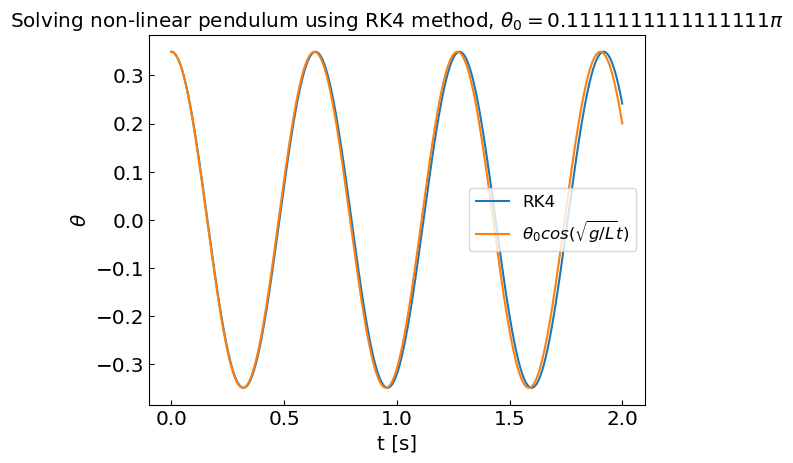

In [20]:
g = 9.81
L = 0.1

def fpendulum(xin, t):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega,-g/L * np.sin(theta)])


theta0 = (20./180.) * np.pi
omega0 = 0.

x0 = np.array([theta0,omega0])
a = 0.
b = 2.0
N = 5000
h = (b-a)/N

sol = ode_rk4_multi(fpendulum, x0, a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]


def theta_small_angles(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)

xpoints_small = theta_small_angles(tpoints)


plt.title("Solving non-linear pendulum using RK4 method, ${\\theta_0 = " + str(theta0/np.pi) + "\pi}$")
plt.xlabel('t [s]')
plt.ylabel('${\\theta}$')
plt.plot(tpoints,xpoints,label='RK4')
plt.plot(tpoints,xpoints_small,label='${\\theta_0 cos(\sqrt{g/L}t)}$')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

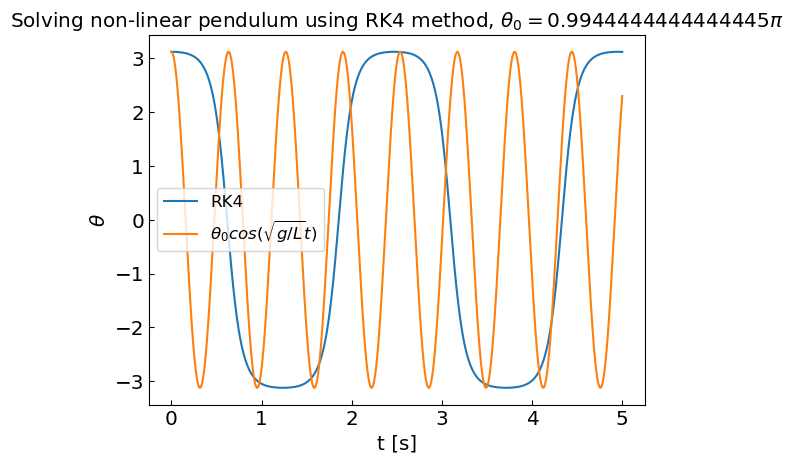

In [21]:
g = 9.81
L = 0.1

def fpendulum(xin, t):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega,-g/L * np.sin(theta)])


theta0 = (179./180.) * np.pi
omega0 = 0.

x0 = np.array([theta0,omega0])
a = 0.
b = 5.0
N = 5000
h = (b-a)/N

sol = ode_rk4_multi(fpendulum, x0, a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]


def theta_small_angles(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)

xpoints_small = theta_small_angles(tpoints)

plt.title("Solving non-linear pendulum using RK4 method, ${\\theta_0 = " + str(theta0/np.pi) + "\pi}$")
plt.xlabel('t [s]')
plt.ylabel('${\\theta}$')
plt.plot(tpoints,xpoints,label='RK4')
plt.plot(tpoints,xpoints_small,label='${\\theta_0 cos(\sqrt{g/L}t)}$')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

## Adaptive time step for system of ODEs

The adaptive 4th-order Runge-Kutta method for single first-order ODE can be generalized to a system of ODEs.
One has to generalize the notion of the difference $|x_1 - x_2|$ between two estimates of the independent variable to the case of vectors $\mathbf{x}_1$ and $\mathbf{x}_2$ of variables.

The simplest choice would be to evaluate the modulus of the difference vector $|\mathbf{x}_1 - \mathbf{x}_2|$, which would be the default choice. Alternatively, in some cases we may only be interested in the accuracy of a single variable from the vector, for example of coordinate $x$ but not of velocity $v$ in case of a second-order ODE cast as system of two first-order ODEs. In this case one can generalize the definition of the distance between $\mathbf{x}_1$ and $\mathbf{x}_2$ as appropriate for the problem at hand.

The implementation of the RK4 scheme with adaptive time step for a system of ODEs can be implemented as follows.

In [22]:
# The default definition of the error (distance) between two state vectors 
# Default: the magnitude of the difference vector
def distance_definition_default(x1, x2):
    diff = x1 - x2
    diffnorm = np.sqrt(np.dot(diff, diff))
    return diffnorm

def ode_rk4_adaptive_multi(f, x0, t0, h0, tmax, delta = 1.e-6, distance_definition = distance_definition_default):
    """Solve an ODE dx/dt = f(x,t) from t = t0 to t = t0 + h*steps 
    using 4th order Runge-Kutta method with adaptive time step.

    Args:
          f: the function that defines the ODE.
         x0: the initial value of the dependent variable.
         t0: the initial value of the time variable.
         h0: the initial time step
       tmax: the maximum time
      delta: the desired accuracy per unit time

    Returns:
    t,x: the pair of arrays corresponding to the time and dependent variables
    """
    
    ts = [t0]
    xs = [x0]
    
    h = h0
    t = t0
    i = 0
        
    while (t < tmax):
        if (t + h >= tmax):
            ts.append(tmax)
            h = tmax - t
            xs.append(ode_rk4_step(f, xs[i], ts[i], h))
            t = tmax
            break
        
        x1 = ode_rk4_step(f, xs[i], ts[i], h)
        x1 = ode_rk4_step(f, x1, ts[i] + h, h)
        x2 = ode_rk4_step(f, xs[i], ts[i], 2*h)
        
        diffnorm = distance_definition(x1, x2)
        if diffnorm == 0.: # To avoid the division by zero
            rho = 2.**4
        else:
            rho = 30. * h * delta / diffnorm
        if rho < 1.:
            h *= rho**(1/4.)
        else:
            if (t + 2.*h) < tmax:
                xs.append(x1)
                ts.append(t + 2*h)
                t += 2*h
            else:
                xs.append(ode_rk4_step(f, xs[i], ts[i], h))
                ts.append(t + h)
                t += h
            i += 1
            h = min(2.*h, h * rho**(1/4.))
        
    return ts,xs

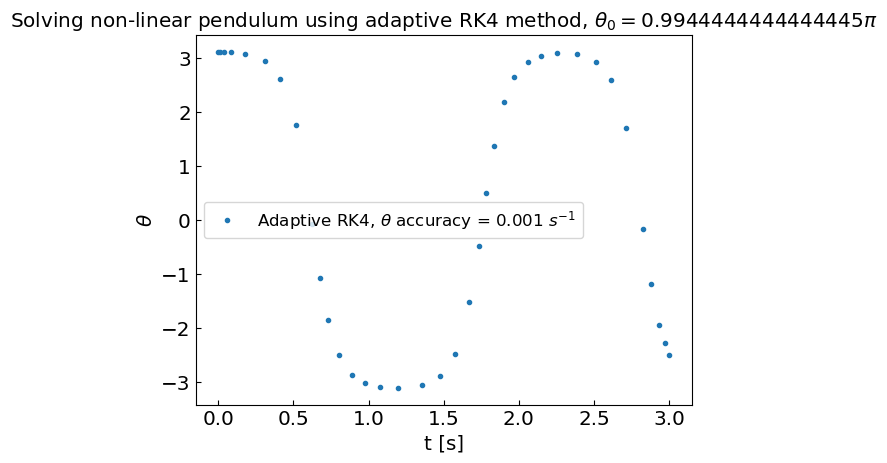

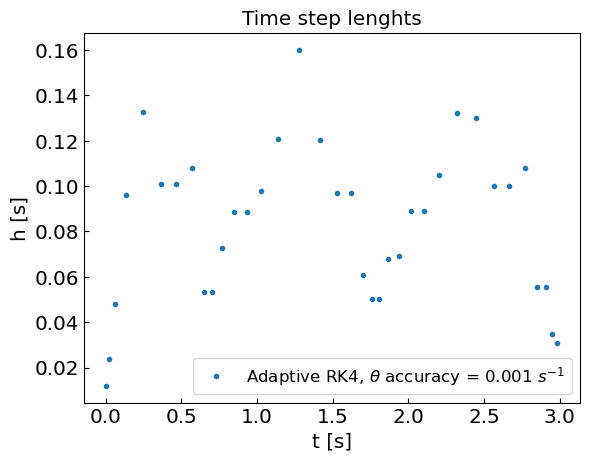

In [23]:
g = 9.81
L = 0.1

def fpendulum(xin, t):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega,-g/L * np.sin(theta)])

def error_definition_pendulum(x1, x2):
    return np.abs(x1[0] - x2[0])

theta0 = (179./180.) * np.pi
omega0 = 0.

x0 = np.array([theta0,omega0])
a = 0.
b = 3.0
N = 500
h0 = (b-a)/N
eps = 1.e-3 # accuracy in theta
sol = ode_rk4_adaptive_multi(fpendulum, x0, a, h0, b, eps, error_definition_pendulum)

tpoints = [t for t in sol[0]]
xpoints = [x[0] for x in sol[1]]
ypoints = [x[1] for x in sol[1]]


plt.title("Solving non-linear pendulum using adaptive RK4 method, ${\\theta_0 = " + str(theta0/np.pi) + "\pi}$")
plt.xlabel('t [s]')
plt.ylabel('${\\theta}$')
plt.plot(tpoints,xpoints,'.',label='Adaptive RK4, ${\\theta}$ accuracy = ' + str(eps) + ' ${s^{-1}}$')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

thpoints = []
hpoints = []
for i in range(len(tpoints) - 1):
    thpoints.append(0.5*(tpoints[i] + tpoints[i+1]))
    hpoints.append(tpoints[i+1] - tpoints[i])
    
plt.title("Time step lenghts")
plt.xlabel('t [s]')
plt.ylabel('h [s]')
plt.plot(thpoints,hpoints,'.',label='Adaptive RK4, ${\\theta}$ accuracy = ' + str(eps) + ' ${s^{-1}}$')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

## Comet motion (Exercise 8.10 from M. Newman *Computational Physics*)



Many comets travel in highly elongated orbits around the Sun.  For
much of their lives they are far out in the solar system, moving very
slowly, but on rare occasions their orbit brings them close to the Sun for
a fly-by and for a brief period of time they move very fast indeed:

<img src="comet.gif" alt="Comet" style="width: 600px;"/> 

This is a classic example of a system for which an adaptive
step size method is useful, because for the large periods of time when the
comet is moving slowly we can use long time-steps, so that the program runs
quickly, but short time-steps are crucial in the brief but fast-moving
period close to the Sun.

The differential equation obeyed by a comet is straightforward to
derive.  The force between the Sun, with mass $M$ at the origin, and a
comet of mass $m$ with position vector $\vec{r}$ is $GMm/r^2$ in direction
$-\vec{r}/r$ (i.e., the direction towards the Sun), and hence Newton's
second law tells us that
$$
m {d^2\vec{r}\over d t^2} = -\biggl({GMm\over r^2}\biggr)\,{\vec{r}\over r}.
$$
Canceling the mass $m$ and taking the $x$ component we have
$$
{d^2 x\over d t^2} = -GM {x\over r^3}\,,
$$
and similarly for the other two coordinates.  We can, however, throw out
one of the coordinates because the comet stays in a single plane as it
orbits.  If we orient our axes so that this plane is perpendicular to
the $z$-axis, we can forget about the $z$ coordinate and we are left with
just two second-order equations to solve:
\begin{align*}
{d^2 x\over d t^2} & = -GM {x\over r^3}\,, \\
{d^2 y\over d t^2} & = -GM {y\over r^3}\,,
\end{align*}
where $r=\sqrt{x^2+y^2}$.

We will write a program to the equations using the fourth-order
Runge--Kutta method with a *fixed* step size.  
As an initial condition, we take a comet at coordinates $x=4$ billion kilometers
and $y=0$ (which is somewhere out around the orbit of Neptune) with
initial velocity $v_x=0$ and $v_y = 500\,\mathrm{m\,s}^{-1}$. The trajectory of the comet will be a plot of $y$
against $x$.

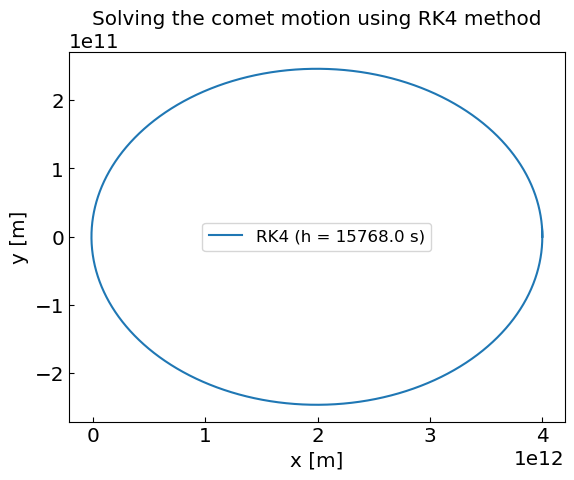

In [24]:
G = 6.67430e-11  # m^3 / kg / s^2
Msun = 1.9885e30 # kg

def fcomet(xin, t):
    x = xin[0]
    y = xin[1]
    vx = xin[2]
    vy = xin[3]
    r = np.sqrt(x*x+y*y)
    return np.array([vx,vy,-G*Msun*x/r**3,-G*Msun*y/r**3])

x0 = [4.e12,0.,0.,500.]

a = 0.
b = 50. * 365. * 24. * 60. * 60. # 50 years
N = 100000                       # 100 thousand RK4 steps
h = (b - a) / N                  # Time step: around 1/5th of a day
sol = ode_rk4_multi(fcomet, x0, a, h, N)

tpoints_rk4_ref = sol[0]
xpoints_rk4_ref = sol[1][:,0]
ypoints_rk4_ref = sol[1][:,1]
vxpoints_rk4_ref = sol[1][:,2]
vypoints_rk4_ref = sol[1][:,3]
vpoints_rk4_ref = [np.sqrt(x[2]*x[2] + x[3]*x[3]) for x in sol[1]]


plt.title("Solving the comet motion using RK4 method")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.plot(xpoints_rk4_ref,ypoints_rk4_ref,label='RK4 (h = ' + str(h) + ' s)')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

Let us now use the RK4 method with an adaptive time step. We expect to have a smaller step near the sun, where the comet motion is faster, and a larger step away from the sun

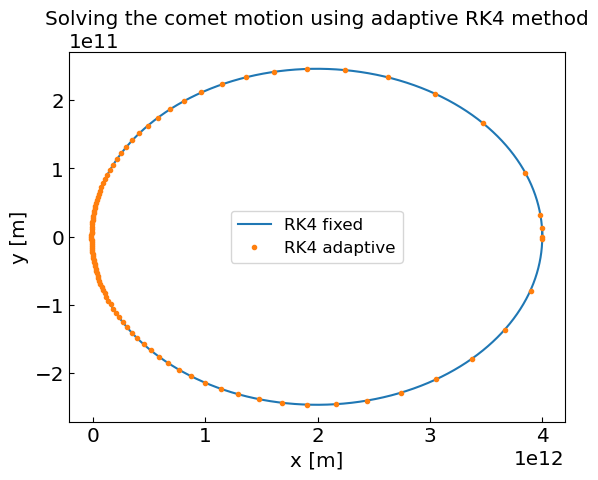

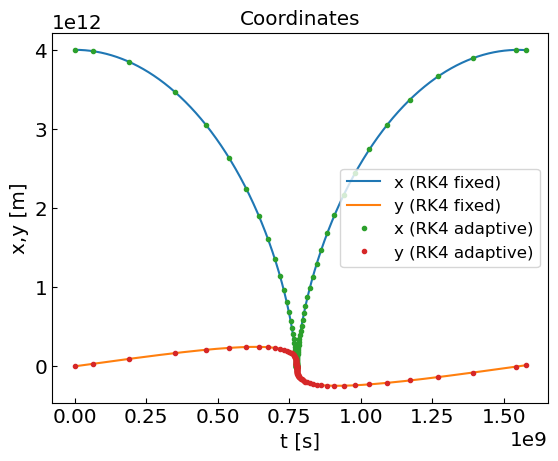

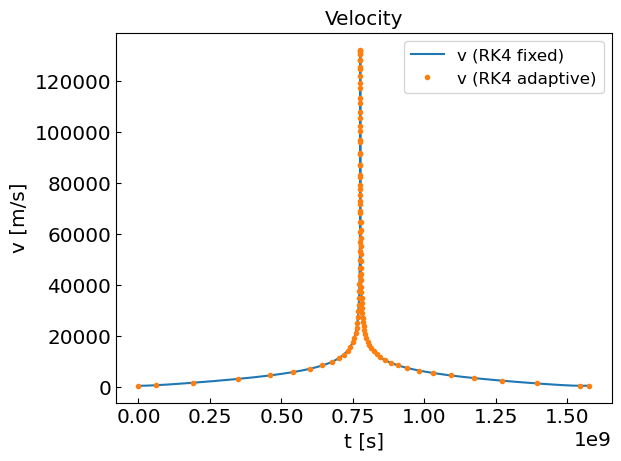

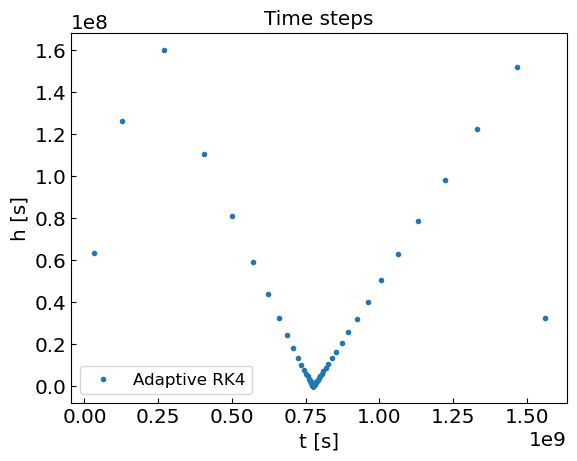

In [25]:
G = 6.67430e-11
Msun = 1.9885e30

def fcomet(xin, t):
    x = xin[0]
    y = xin[1]
    vx = xin[2]
    vy = xin[3]
    r = np.sqrt(x*x+y*y)
    return np.array([vx,vy,-G*Msun*x/r**3,-G*Msun*y/r**3])

def error_definition_comet(x1, x2):
    return np.sqrt((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2)

x0 = [4.e12,0.,0.,500.]

a = 0.
b = 50. * 365. * 24. * 60. * 60. # 50 years
h0 = 1. * 365. * 24. * 60. * 60. # Initial time step: 1 year
delta = 1000. * 1.e3 / (365. * 24. * 60. * 60.)
sol = ode_rk4_adaptive_multi(fcomet, x0, a, h0, b, delta, error_definition_comet)

tpoints = [t for t in sol[0]]
xpoints = [x[0] for x in sol[1]]
ypoints = [x[1] for x in sol[1]]
vxpoints = [x[2] for x in sol[1]]
vypoints = [x[3] for x in sol[1]]
vpoints = [np.sqrt(x[2]*x[2] + x[3]*x[3]) for x in sol[1]]

plt.title("Solving the comet motion using adaptive RK4 method")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.plot(xpoints_rk4_ref,ypoints_rk4_ref,label='RK4 fixed')
plt.plot(xpoints,ypoints,'.',label='RK4 adaptive')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

plt.title("Coordinates")
plt.xlabel('t [s]')
plt.ylabel('x,y [m]')
plt.plot(tpoints_rk4_ref,xpoints_rk4_ref,label='x (RK4 fixed)')
plt.plot(tpoints_rk4_ref,ypoints_rk4_ref,label='y (RK4 fixed)')
plt.plot(tpoints,xpoints,'.',label='x (RK4 adaptive)')
plt.plot(tpoints,ypoints,'.',label='y (RK4 adaptive)')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

plt.title("Velocity")
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.plot(tpoints_rk4_ref,vpoints_rk4_ref,label='v (RK4 fixed)')
plt.plot(tpoints,vpoints,'.',label='v (RK4 adaptive)')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

thpoints = []
hpoints = []
for i in range(len(tpoints) - 1):
    thpoints.append(0.5*(tpoints[i] + tpoints[i+1]))
    hpoints.append(tpoints[i+1] - tpoints[i])
    
plt.title("Time steps")
plt.xlabel('t [s]')
plt.ylabel('h [s]')
plt.plot(thpoints,hpoints,'.',label='Adaptive RK4')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

## Leapfrog method

<img src="fig8-9-leapfrog.png" alt="Leapfrog" style="width: 500px;"/> 
<center>
    (a) 2nd-order Runge-Kutta<br/>
    (b) Leapfrog<br/>
    Source: M. Newman "Computational Physics"
</center>

Recall the 2nd order Runge-Kutta (midpoint) method.

The full step proceeds by evaluating
$$
x(t+h) = x(t) + h f[x(t+h/2),t+h/2],
$$
where the midpoint value $x(t+h/2)$ is estimated using Euler's method
$$
x(t+h/2) = x(t) + \frac{1}{2} h f(x,t)~.
$$

The idea of the leapfrog method is to use the last equation (Euler half-step) only in the first iteration, and then use the first equation to estimate both $x(t+h)$ and $x(t+3h/2)$, i.e., given the values of $x(t)$ and $x(t+h/2)$ at each step the algorithm calculates a pair of values
\begin{align*}
x(t+h) &= x(t) + h f[x(t+h/2),t+h/2], \\
x(t+3h/2) &= x(t+h/2) + h f[x(t+h),t+h].
\end{align*}

The attractive features of this algorithm is that it is time reversible. By changing $h \to -h$ one gets
\begin{align*}
x(t-h) &= x(t) - h f[x(t-h/2),t-h/2], \\
x(t-3h/2) &= x(t-h/2) - h f[x(t-h),t-h],
\end{align*}
i.e. the same steps are performed in reverse.
Changing $t \to t + 3h/2$ one gets
\begin{align*}
x(t+h/2) &= x(t+3h/2) - h f[x(t+h),t+h], \\
x(t) &= x(t+h) - h f[x(t+h/2),t+h/2],
\end{align*}

The time reversal symmetry is important since the microscopic equations are typically time-reversal, so it is good to have this feature built-in by construction in the numerical scheme.

In [26]:
def ode_leapfrog_step(f, x, x2, t, h):
    """Perform a single step h using the leapfrog method.

    Args:
     f: the function that defines the ODE.
     x: the value of x(t)
    x2: the value of x(t+h/2)
     t: the present value of the time variable.
     h: the time step

    Returns:
    xnew, xnew2: the value of the dependent variable at the steps t+h, t+3h/2
    """
    
    xnew = x + h * f(x2,t+h/2.)
    xnew2 = x2 + h * f(xnew, t + h)
    return xnew, xnew2

def ode_leapfrog_multi(f, x0, t0, h, nsteps):
    """Multi-dimensional version of the leapfrog method.
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    x2 = np.zeros(len(x0))
    t[0] = t0
    x[0,:] = x0
    x2[:] = ode_euler_step(f, x0, t0, h/2.)
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1], x2 = ode_leapfrog_step(f, x[i], x2, t[i], h)
    return t,x

Let us return to the problem of a non-linear pendulum and apply the leap-frog method.
We can monitor the behavior of energy
$$
E = m L^2 \dot{\theta}^2/2 - mgL \cos(\theta)
$$
as a function of time.

If $\theta_0 = \pi/2$ and $\dot{\theta}_0 = 0$ the total energy is zero.

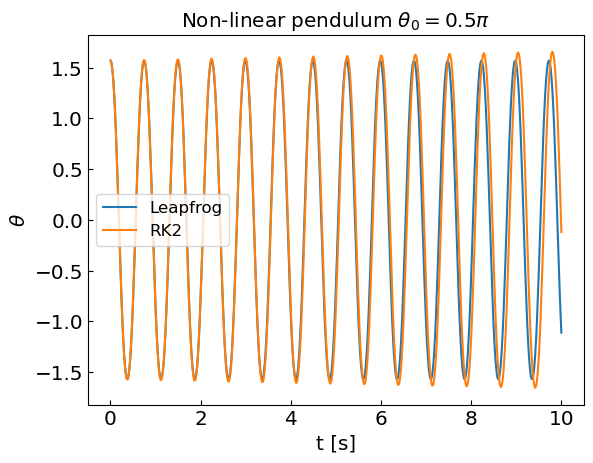

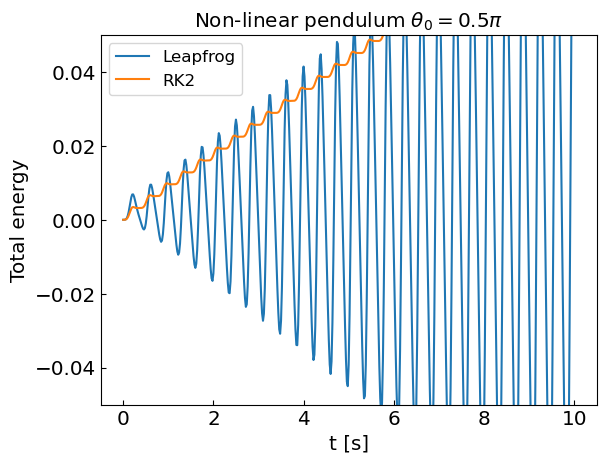

In [27]:
g = 9.81 # m/s^2
L = 0.1  # m

def fpendulum(xin, t):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega,-g/L * np.sin(theta)])
    #return np.array([omega,-g/L * theta])

# The energy of a pendulum
def pendulum_energy(x):
    return L*L*x[1]**2/2. - g*L*np.cos(x[0])
    #return L*L*x[1]**2/2. - g*L*x[0]**2/2.


theta0 = (90./180.) * np.pi
omega0 = 0.

x0 = np.array([theta0,omega0])
a = 0.
b = 10.
N = 500
h = (b-a)/N

sol_leapfrog = ode_leapfrog_multi(fpendulum, x0, a, h, N)
sol_rk2 = ode_rk2_multi(fpendulum, x0, a, h, N)
tpoints = sol_leapfrog[0]
xpoints = sol_leapfrog[1][:,0]
ypoints = sol_leapfrog[1][:,1]

xpoints_rk2 = sol_rk2[1][:,0]

def theta_small_angles(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)

xpoints_small = theta_small_angles(tpoints)

plt.title("Non-linear pendulum ${\\theta_0 = " + str(theta0/np.pi) + "\pi}$")
plt.xlabel('t [s]')
plt.ylabel('${\\theta}$')
plt.plot(tpoints,xpoints,label='Leapfrog')
plt.plot(tpoints,xpoints_rk2,label='RK2')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

energies_leapfrog = [pendulum_energy(x) for x in sol_leapfrog[1]]
energies_rk2 = [pendulum_energy(x) for x in sol_rk2[1]]

plt.title("Non-linear pendulum ${\\theta_0 = " + str(theta0/np.pi) + "\pi}$")
plt.xlabel('t [s]')
plt.ylabel('Total energy')
#plt.ylim(-2,2)
plt.ylim(-0.05,0.05)
plt.plot(tpoints,energies_leapfrog,label='Leapfrog')
plt.plot(tpoints,energies_rk2,label='RK2')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

The leapfrog method shows greater stability as the average energy is conserved.
Such a method is thus particularly suitable for long simulations of periodic systems.

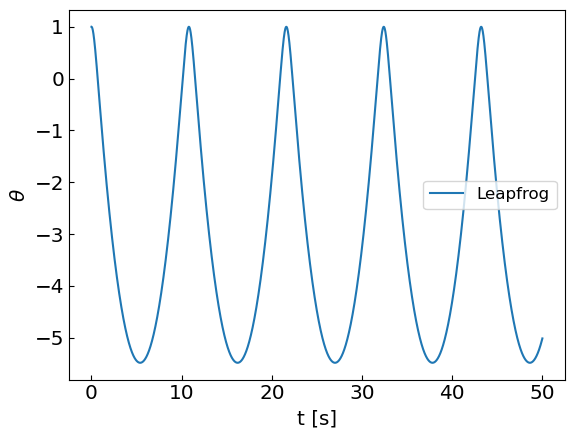

In [28]:
# Exercise 8.11

def fpendulum(xin, t):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega,omega**2 - theta - 5])
    #return np.array([omega,-g/L * theta])

theta0 = 1.
omega0 = 0.

x0 = np.array([theta0,omega0])
a = 0.
b = 50.
N = 50000
h = (b-a)/N
h = 0.001

sol_leapfrog = ode_leapfrog_multi(fpendulum, x0, a, h, N)
sol_rk2 = ode_rk2_multi(fpendulum, x0, a, h, N)
tpoints = sol_leapfrog[0]
xpoints = sol_leapfrog[1][:,0]
ypoints = sol_leapfrog[1][:,1]

xpoints_rk2 = sol_rk2[1][:,0]

def theta_small_angles(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)

xpoints_small = theta_small_angles(tpoints)

plt.xlabel('t [s]')
plt.ylabel('${\\theta}$')
plt.plot(tpoints,xpoints,label='Leapfrog')
#plt.plot(tpoints,xpoints_rk2,label='RK2')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

## Verlet method

Suppose we are solving Newton's equations of motion
$$
\frac{d^2 x}{dt^2} = f(x,t).
$$
These are rewritten as
\begin{align*}
\frac{dx}{dt} &= v, \\
\frac{dv}{dt} &= f(x,t).
\end{align*}

If we apply the leapfrog scheme to this system of equations, it will look like
\begin{align*}
x(t+h) & = x(t) + h v(t + h/2), \\
v(t+3h/2) &= v(t+h/2) + h f[x(t+h), t+h)],
\end{align*}
i.e. the coordinates are evaluated are full steps using velocity estimates at half-steps,
and vice versa.

This is the essence of the Verlet method.
It's feature is that we do not need to keep track of coordinates at half-steps (only the velocities) and of velocities at full steps. In case we are interested in velocity values also at full step, these can be estimated as $v(t+h) = v(t+h/2) + (h/2) f[x(t+h),t+h].

The full algorithm is as follows. Given initial values $x(t)$ and $v(t)$ one first computes
$$
v(t+h/2) = v(t) + \frac{h}{2} f[x(t),t].
$$
Then each step of the Verlet algorith corresponds to
\begin{align*}
x(t+h) & = x(t) + h v(t+h/2), \\
k & = h f[x(t+h),t+h), \\
v(t+h) & = v(t+h/2) + k/2, \\
v(t+3h/2) & = v(t+h/2) + k.
\end{align*}

The algorith is straightforwardly generalizable to more than one variable.

## Modified midpoint method

Recall that steps in the leapfrog method are time-reversible ($h \to -h$).
For this reason the local error (per one step) contains only odd powers of $h$,
while the global error integrating from $t$ to $t+H$ would have only even powers of $h$.
The only issue is the first Euler half-step $x(t+h/2) = x(t) + hf(x,t)$ which is not symmetric in $h$.
This half-step ruins the desired property of the global error containing only even powers of $h$.

To fix this issue one uses an extra step at the very end,
which is called the modified midpoint method.
Let $y_n = x(t+H-h/2)$ and $x_n = x(t+H)$ be the estimates of the solution resulting from the leapfrog method.
One then re-evaluates $x(t+H)$ as an average of $x_n$ and the $x(t+H)$ evaluted usinf Euler half-step from $y_n$:
$$
x(t+H) = \frac{1}{2} [x_n + y_n + \frac{h}{2} f(x_n,t+H)].
$$

This modification cancels all odd terms in the global error for $x(t+H)$.

In [29]:
def ode_MMM_multi(f, x0, t0, H, nsteps):
    """Multi-dimensional version of the modified midpoint method.
    """
    
    h = H / nsteps
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    x2 = np.zeros(len(x0))
    t = t0
    x = x0
    y = ode_euler_step(f, x0, t0, h/2.)
    for i in range(0, nsteps):
        yprev = y
        x, y = ode_leapfrog_step(f, x, y, t, h)
        t = t + h
        
    return 0.5 * (x + yprev + 0.5 * h * f(x,t))

## Bulirsch-Stoer method

Bulirsch-Stoer method is an analogue of Romberg integration applied to ODE.
The method allows one to integrate a (system) of ODE for $t$ to $t+H$ to desired accuracy.
To achieve that one uses the modified midpoint method with increasing number of steps,
and the difference between the subsequent steps to cancel out higher and higher-order error terms in $h$.

The iterative procedure is as follows.
Let $R_{n,1}$ be an estimate of $x(t+H)$ from the modified midpoint method using $n$ steps of size $h_n = H/n$.
Then
$$
x(t+H) = R_{n,1} + O(h_n^2).
$$
One constructs high-order approximations $R_{n,m}$ such that
$$
x(t+H) = R_{n,m} + O(h_n^{2m}),
$$
from the following iterative procedure
$$
R_{n,m+1} = R_{n,m} + \frac{R_{n,m} - R_{n-1,m}}{[n/(n-1)]^{2m} - 1}~.
$$

The procedure goes one in incremental steps of $n$ until the distane between the solution estimates $R_{n,n}$ and $R_{n,n-1}$ reaches the desired accuracy.

In practice, if the desired accuracy is not reached after $n \sim 10$ steps, it may indicate that $H$ is too large, and one has to split it into two subintervals of width $H/2$ and apply the Bulirsch-Stoer method recursively.

In [30]:
def bulirsch_stoer_step(f, x0, t0, H, delta = 1.e-6, distance_definition = distance_definition_default, maxsteps = 10):
    """Use Bulirsch-Stoer method to integrate for t to t+H.
    """
    n = 1
    R1 = np.empty([1,len(x0)],float)
    R1[0] = ode_MMM_multi(f, x0, t0, H, 1)
    error = 2. * H * delta
    while error > H*delta and n < maxsteps:
        n += 1
        R2 = R1
        R1 = np.empty([n,len(x0)],float)
        R1[0] = ode_MMM_multi(f, x0, t0, H, n)
        for m in range(1,n):
            epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1)
            R1[m] = R1[m-1] + epsilon
        error = distance_definition(R1[n-2],R1[n-1])
        
    if n == maxsteps:
        # Reached maximum number of substeps in Bulirsch-Stoer method
        # reducing the time step and applying the method recursively
        sol1 = bulirsch_stoer_step(f, x0, t0, H/2., delta, distance_definition, maxsteps)
        sol2 = bulirsch_stoer_step(f, sol1[-1][1], t0 + H/2., H/2., delta, distance_definition, maxsteps)
        return sol1 + sol2
    
    return [[t0+H, R1[n - 1]]]

In [31]:
def bulirsch_stoer(f, x0, t0, nsteps, tmax, delta = 1.e-6, distance_definition = distance_definition_default, maxsubsteps = 10):
    """Use Bulirsch-Stoer method to integrate for t to tmax using nsteps Bulirsch-Stoer steps
    """
    H = (tmax - t0) / nsteps
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t = [t0]
    x = [x0]
    for i in range(0, nsteps):
        bst = bulirsch_stoer_step(f, x[-1], t[-1], H, delta, distance_definition, maxsubsteps)
        [t.append(el[0]) for el in bst]
        [x.append(el[1]) for el in bst]
    return t,x

Let us apply the Bulirsch-Stoer method to solve the motion of non-linear pendulum.
Due to the fact that the method dynamically adjust $H$ to reach the desired accuracy, we can start with just one step.

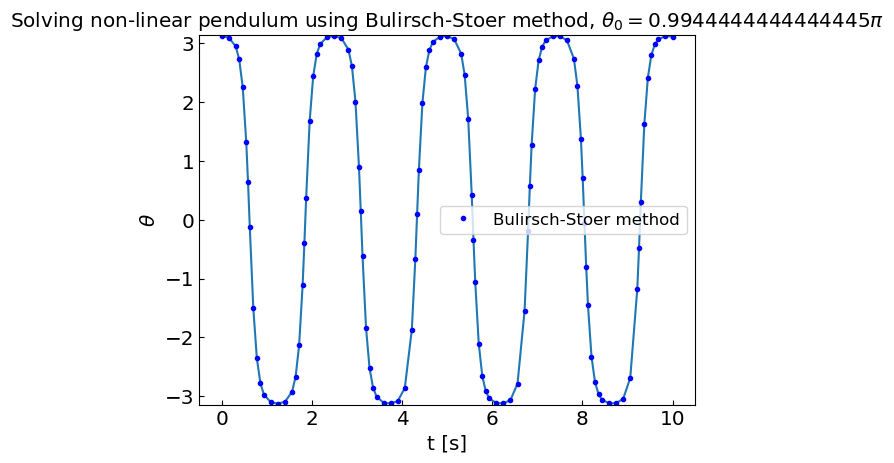

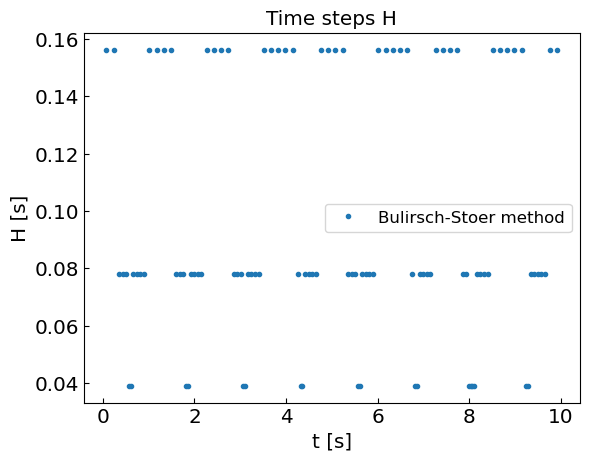

In [32]:
g = 9.81
L = 0.1

def fpendulum(xin, t):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega,-g/L * np.sin(theta)])

def error_definition_pendulum(x1, x2):
    return np.abs(x1[0] - x2[0])

theta0 = 179. * np.pi / 180.
omega0 = 0.
x0 = np.array([theta0,omega0])
a = 0.
b = 10.0
N = 1
eps = 1.e-8
maxsubsteps = 10

sol = bulirsch_stoer(fpendulum, x0, a, N, b, eps, error_definition_pendulum, maxsubsteps)

tpoints = [t for t in sol[0]]
xpoints = [x[0] for x in sol[1]]
ypoints = [x[1] for x in sol[1]]


plt.title("Solving non-linear pendulum using Bulirsch-Stoer method, ${\\theta_0 = " + str(theta0/np.pi) + "\pi}$")
plt.xlabel('t [s]')
plt.ylabel('${\\theta}$')
plt.plot(tpoints,xpoints)
plt.plot(tpoints,xpoints,'b.',label='Bulirsch-Stoer method')
plt.ylim(-np.pi,np.pi)
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

thpoints = []
hpoints = []
for i in range(len(tpoints) - 1):
    thpoints.append(0.5*(tpoints[i] + tpoints[i+1]))
    hpoints.append(tpoints[i+1] - tpoints[i])
    
plt.title("Time steps H")
plt.xlabel('t [s]')
plt.ylabel('H [s]')
plt.plot(thpoints,hpoints,'.',label='Bulirsch-Stoer method')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

Let us now apply the Bulirch-Stoer method to analyze the comet motion.
Again, we can use a single step $H$ initially

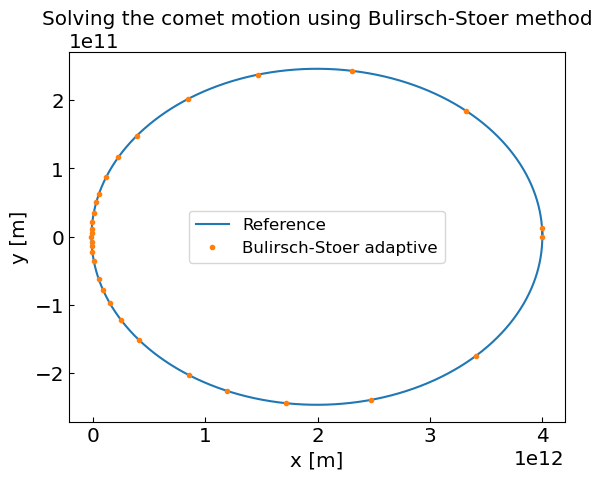

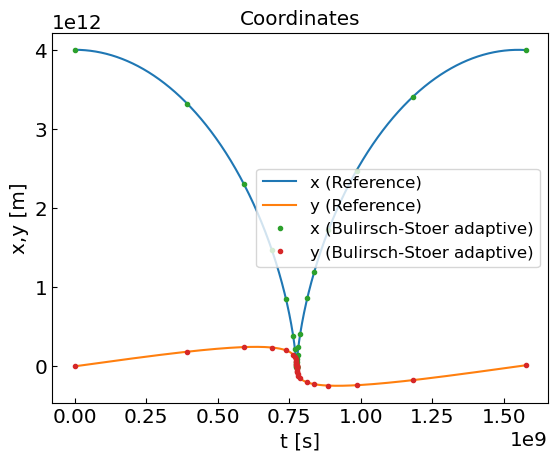

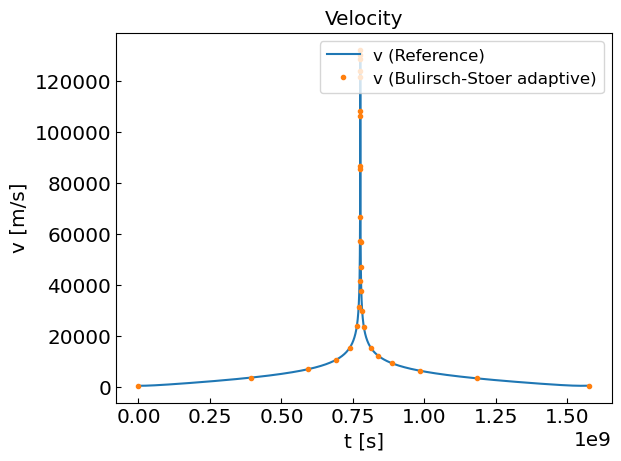

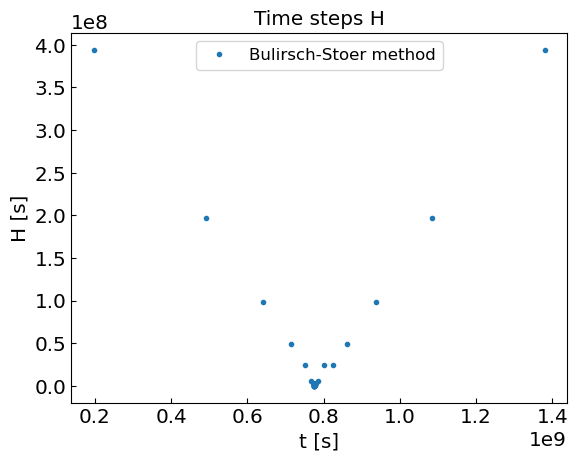

In [33]:
G = 6.67430e-11
Msun = 1.9885e30

def fcomet(xin, t):
    x = xin[0]
    y = xin[1]
    vx = xin[2]
    vy = xin[3]
    r = np.sqrt(x*x+y*y)
    return np.array([vx,vy,-G*Msun*x/r**3,-G*Msun*y/r**3])

def error_definition_comet(x1, x2):
    return np.sqrt((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2)

x0 = [4.e12,0.,0.,500.]
a = 0.
b = 50. * 365. * 24. * 60. * 60.
N = 1
delta = 1. * 1.e3 / (365. * 24. * 60. * 60.)
sol = bulirsch_stoer(fcomet, x0, a, N, b, delta, error_definition_comet)

tpoints = [t for t in sol[0]]
xpoints = [x[0] for x in sol[1]]
ypoints = [x[1] for x in sol[1]]
vxpoints = [x[2] for x in sol[1]]
vypoints = [x[3] for x in sol[1]]
vpoints = [np.sqrt(x[2]*x[2] + x[3]*x[3]) for x in sol[1]]

plt.title("Solving the comet motion using Bulirsch-Stoer method")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.plot(xpoints_rk4_ref,ypoints_rk4_ref,label='Reference')
plt.plot(xpoints,ypoints,'.',label='Bulirsch-Stoer adaptive')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

plt.title("Coordinates")
plt.xlabel('t [s]')
plt.ylabel('x,y [m]')
plt.plot(tpoints_rk4_ref,xpoints_rk4_ref,label='x (Reference)')
plt.plot(tpoints_rk4_ref,ypoints_rk4_ref,label='y (Reference)')
plt.plot(tpoints,xpoints,'.',label='x (Bulirsch-Stoer adaptive)')
plt.plot(tpoints,ypoints,'.',label='y (Bulirsch-Stoer adaptive)')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

plt.title("Velocity")
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.plot(tpoints_rk4_ref,vpoints_rk4_ref,label='v (Reference)')
plt.plot(tpoints,vpoints,'.',label='v (Bulirsch-Stoer adaptive)')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

thpoints = []
hpoints = []
for i in range(len(tpoints) - 1):
    thpoints.append(0.5*(tpoints[i] + tpoints[i+1]))
    hpoints.append(tpoints[i+1] - tpoints[i])
    
plt.title("Time steps H")
plt.xlabel('t [s]')
plt.ylabel('H [s]')
plt.plot(thpoints,hpoints,'.',label='Bulirsch-Stoer method')
#plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()

## SIR model

The SIR model is the simplest model for infection disease dynamics in the population.
The population is split into susceptible ($S$), infected ($I$), and recovered/immune ($R$) parts.
The SIR equations read
\begin{align*}
\frac{dS}{dt} & = -\beta S I, \\
\frac{dI}{dt} & = \beta S I - \gamma I, \\
\frac{dR}{dt} & = \gamma I.
\end{align*}

Here $\beta$ is the infection rate and $\gamma$ is the recovery rate.
They are inversely proportional to the average time each infected person spreads the disease to (when all of population is susceptible, $S \approx 1$) and that it takes to recover. The ratio $R_0 = \beta / \gamma$ is basic reproduction number.

Given that $S + I + R = 1 = \rm const$ at all times, one only needs to solve two ODEs, e.g. $dS/dt$ and $dI/dt$.

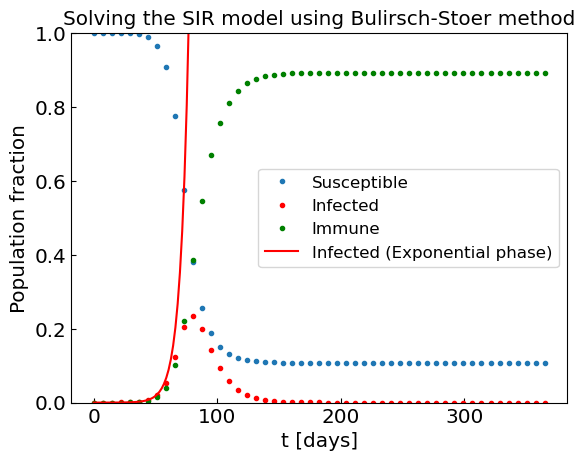

In [34]:
gam = 1./10.     # 10 days recovery rate
beta = 1./4.     # 4 days to infect other person
# R0 = beta/gam  # basic reproduction factor
kappa = 1. / 90. # immunity lasts for 90 days

def fSIR(xin, t):
    S = xin[0]
    I = xin[1]
    R = 1. - S - I
    return np.array([-beta * S * I, beta * I * S - gam * I])

t0 = 0.
tend = 365.

I0 = 1.e-5           # Initial fraction of infected
x0 = [1. - I0, I0]   # Initial conditions

delta = 1.e-9 # The desired accuracy per day
N = 50        # Minimum number of steps
sol = bulirsch_stoer(fSIR, x0, t0, N, tend, delta)

tpoints = [t for t in sol[0]]
Spoints = [x[0] for x in sol[1]]
Ipoints = [x[1] for x in sol[1]]
Rpoints = [1. - x[0] - x[1] for x in sol[1]]



#Nrk4 = 1000
#hrk4 = (tend - t0) / Nrk4
#sol = ode_rk4_multi(fSIR, x0, t0, hrk4, Nrk4)

# Exponential phase
texpon = np.linspace(0.,90.,50)
def fIexp(t):
    R0 = beta / gam
    return x0[1] * np.exp(gam*(R0-1.)*t)
Iexpon = fIexp(texpon)

plt.title("Solving the SIR model using Bulirsch-Stoer method")
plt.xlabel('t [days]')
plt.ylabel('Population fraction')
plt.ylim(0,1)
plt.plot(tpoints,Spoints,'.',label='Susceptible')
plt.plot(tpoints,Ipoints,'.',label='Infected',color='red')
plt.plot(tpoints,Rpoints,'.',label='Immune',color='green')
plt.plot(texpon,Iexpon,label='Infected (Exponential phase)',color='red')
plt.legend()
plt.show()

One can clearly see the initial exponential phase of the epidemic, and its end once a sufficient amount of population obtained immunity.

What if the immunity does not last forever but lost after some time (e.g. three months)?
One can add this effect into the equations through the corresponds loss of immunity rate $\kappa$:

\begin{align*}
\frac{dS}{dt} & = -\beta S I + \kappa R, \\
\frac{dI}{dt} & = \beta S I - \gamma I, \\
\frac{dR}{dt} & = \gamma I - \kappa R.
\end{align*}

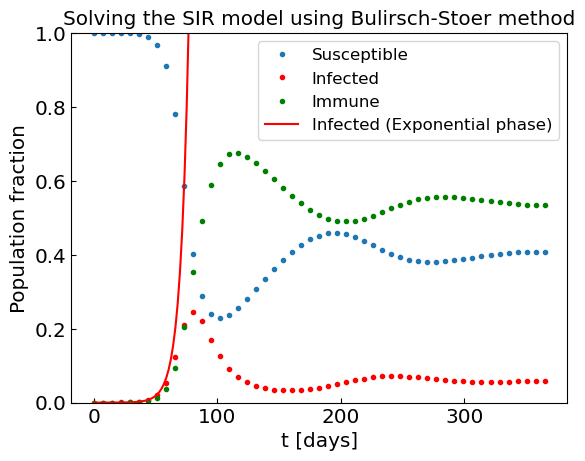

In [35]:
gam = 1./10.     # 10 days recovery rate
beta = 1./4.     # 4 days to infect other person
# R0 = beta/gam  # basic reproduction factor
immu = 1. / 90. # immunity lasts for 90 days

def fSIR(xin, t):
    S = xin[0]
    I = xin[1]
    R = 1. - S - I
    # print(xin)
    return np.array([-beta * S * I + immu * (1. - S - I), beta * I * S - gam * I])

t0 = 0.
tend = 365.

I0 = 1.e-5
x0 = [1. - I0, I0]

delta = 1.e-9 # The desired accuracy per day
N = 50
sol = bulirsch_stoer(fSIR, x0, t0, N, tend, delta)

tpoints = [t for t in sol[0]]
Spoints = [x[0] for x in sol[1]]
Ipoints = [x[1] for x in sol[1]]
Rpoints = [1. - x[0] - x[1] for x in sol[1]]


#Nrk4 = 1000
#hrk4 = (tend - t0) / Nrk4
#sol = ode_rk4_multi(fSIR, x0, t0, hrk4, Nrk4)

# Exponential phase
texpon = np.linspace(0.,90.,50)
def fIexp(t):
    R0 = beta / gam
    return x0[1] * np.exp(gam*(R0-1.)*t)
Iexpon = fIexp(texpon)

plt.title("Solving the SIR model using Bulirsch-Stoer method")
plt.xlabel('t [days]')
plt.ylabel('Population fraction')
plt.ylim(0,1)
plt.plot(tpoints,Spoints,'.',label='Susceptible')
plt.plot(tpoints,Ipoints,'.',label='Infected',color='red')
plt.plot(tpoints,Rpoints,'.',label='Immune',color='green')
plt.plot(texpon,Iexpon,label='Infected (Exponential phase)',color='red')
plt.legend()
plt.show()

## Shooting method

Let us solve the problem of a vertically thrown ball at $t = 0$ which lands back on the ground at $t = 10$. We want to find the initial velocity. The equations of motion are
\begin{align}
\frac{dx}{dt} & = v, \\
\frac{dv}{dt} & = -g,
\end{align}
$x(0) = 0$ and $v(0) = v_0$.

We shall find the value of $v_0$ using the bisection method and solving the ODEs with 4th order Runge-Kutta method.

In [36]:
last_bisection_iterations = 0  # Count how many interactions it took
bisection_verbose = False

def bisection_method(
    f,                    # The function whose root we are trying to find
    a,                    # The left boundary
    b,                    # The right boundary
    tolerance = 1.e-10,   # The desired accuracy of the solution
    ):
    fa = f(a)                           # The value of the function at the left boundary
    fb = f(b)                           # The value of the function at the right boundary
    if (fa * fb > 0.):
        return None                     # Bisection method is not applicable
    
    global last_bisection_iterations
    last_bisection_iterations = 0
    
    
    while ((b-a) > tolerance):
        last_bisection_iterations += 1
        c = (a + b) / 2.                # Take the midpoint
        fc = f(c)                       # Calculate the function at midpoint
        
        
        if bisection_verbose:
            print("Iteration: {0:5}, c = {1:20.15f}, f(c) = {2:10.15f}".format(last_bisection_iterations, c, fc))
        
        if (fc * fa < 0.):              
            b = c                       # The midpoint is the new right boundary
            fb = fc
        else:                           
            a = c                       # The midpoint is the new left boundary
            fa = fc

    return (a+b) / 2.                   

In [37]:
g = 9.81 # m/s^2
# ODEs
def fball(xin,t):
    x = xin[0]
    v = xin[1]
    return np.array([v,-g])

# Initial and final times
t0 = 0.
tend = 10.
# Number of RK4 steps
Nrk4 = 100
hrk4 = (tend - t0) / Nrk4

# Desired accuracy for v0
accuracy_v0 = 1.e-10 # m/s

v0min = 0.01   # m/s
v0max = 1000.0 # m/s

def fbisection(v0):
    x0 = [0., v0]
    return ode_rk4_multi(fball, x0, t0, hrk4, Nrk4)[1][-1][0]

v0sol = bisection_method(fbisection, v0min, v0max, accuracy_v0)
print("The required initial velocity is",v0sol,"m/s")

The required initial velocity is 49.0500000000017 m/s
